In [1]:
from collections import Counter
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from knn_model import KNN
from knn_model import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as atlas
import plotly.express as px


Iris dataset contiene 4 caracteristicas de 50 muestras de tres especies de Iris. Las cuales se utilizarán para crear un modelo que clasifique dichas especies.

Información de atributos:

1. sepal length en cm 
2. sepal width en cm
3. petal length en cm
4. petal width en cm
5. class:  
-- Iris Setosa  
-- Iris Versicolour  
-- Iris Virginica  
Variables independientes 1:4  
Variable dependiente(etiqueta) 5

In [2]:
#Se carga la base de datos Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
#Mostrar tamaño y dataset de variables independientes
print(X.shape)
#print(X)


(150, 4)


In [4]:
#Mostrar tamaño y dataset de variable dependiente
print(y.shape)
#print(y)

(150,)


In [5]:
#split dataset en proporción 80/20 (train/test) de acuerdo a las indicaciones del problema
#random state fijo para reordenar aleatoriamente con la misma semilla
X_train, X_test, y_train, y_test = train_test_split(X, y)

Para la calisificación se usará un modelo de clasificación de KNN (K Vecinos más cercanos - K Nearest Neighbors)

In [6]:
k = 3 # k es el numero de vecinos cerca a comparar
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))

KNN classification accuracy 0.9333333333333333


Se obtuvo en una primera prueba un accurary de 93% lo cual es bantante preciso, sin embargo se realizarán pruebas secundarias para validar el accurary actual y realizar ajustes a los parametros del modelo en caso de que se obtenga un mejor accuracy.

In [7]:
b_accuracy = accuracy(y_test, predictions)
b_k = k
for i in range (3,30):
    k = i # k es el numero de vecinos cerca a comparar
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    a_accuracy = accuracy(y_test, predictions)
    print("KNN classification accuracy for k=" + str(k) + ' : ', accuracy(y_test, predictions))
    if a_accuracy > b_accuracy:
        b_k = i
    if a_accuracy == 1:
        break
print('k optima para obtener el mayor accuracy= ', str(b_k))

KNN classification accuracy for k=3 :  0.9333333333333333
KNN classification accuracy for k=4 :  0.9333333333333333
KNN classification accuracy for k=5 :  0.9333333333333333
KNN classification accuracy for k=6 :  0.9333333333333333
KNN classification accuracy for k=7 :  0.9666666666666667
KNN classification accuracy for k=8 :  0.9666666666666667
KNN classification accuracy for k=9 :  0.9666666666666667
KNN classification accuracy for k=10 :  0.9333333333333333
KNN classification accuracy for k=11 :  0.9666666666666667
KNN classification accuracy for k=12 :  0.9333333333333333
KNN classification accuracy for k=13 :  0.9666666666666667
KNN classification accuracy for k=14 :  0.9666666666666667
KNN classification accuracy for k=15 :  1.0
k optima para obtener el mayor accuracy=  15


Error mínimo:- 0.0 K = 15


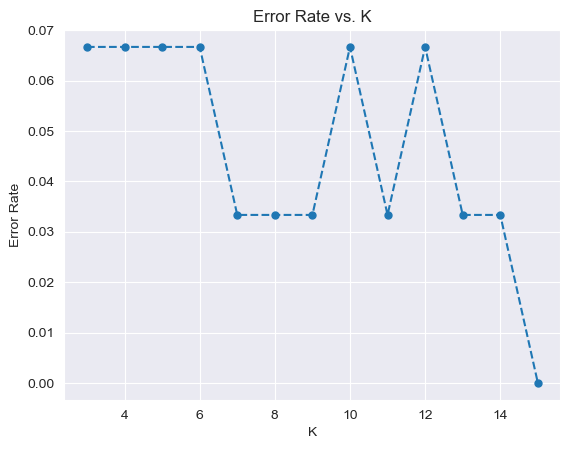

In [8]:
error_rate = []
for i in range(3,b_k+1):
    k = i # k es el numero de vecinos cerca a comparar
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

sns.set_style("darkgrid")
plt.plot(range(3,b_k+1),error_rate, linestyle='dashed', marker='o', markersize=5)
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Error mínimo:-",min(error_rate),"K =",error_rate.index(min(error_rate))+3)

Al realizar las pruebas se comprueba que al utilizar k = 15 se obtiene un 100% de accuracy. Se procede a validar.

In [9]:
k = 15 # k es el numero de vecinos cerca a comparar
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))

KNN classification accuracy 1.0


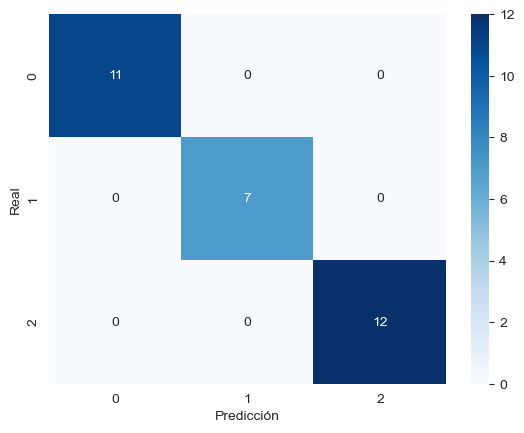

In [10]:
# Matriz de confusión de las predicciones de test
confusion_matrix_v = pd.crosstab(
    y_test.ravel(),
    predictions,
    rownames=['Real'],
    colnames=['Predicción']
)
fx = sns.heatmap(confusion_matrix_v, annot=True, cmap=plt.cm.Blues)
atlas.show()

Con la matriz de confusión se confirma que efectivamente el modelo obtiene un 100% de presición en las predicciones. Adicional se muestra a continuación un scatter plot de la clasificación real/predicción.

In [11]:
fig = px.scatter(
    #x="Sepal length(cm)", y="Sepal Width(cm)"
    X_test, x=0, y=1,
    color=predictions, color_continuous_scale='RdBu',
    symbol=y_test,
    labels={'0': "Sepal Length (cm)", '1': "Sepal Width (cm)",'symbol': 'label', 'color': 'score of <br>class'}
)
fig.update_traces(marker_size=8, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

Por ultimo se procede a realizar un cross validation(validación cruzada) para evaluar el modelo.

In [12]:
X_train, X_test, y_train, y_test = cross_validation(X, y) # Se crean diccionarios con los 5 folds de datos

In [13]:
avg_acc = 0
for i in range (1,6): # se utilizarán 5 folds para la validación cruzada
    k = b_k  
    clf = KNN(k=k)
    clf.fit(X_train[i], y_train[i])
    predictions = clf.predict(X_test[i])
    a_accuracy = accuracy(y_test[i], predictions)
    print("KNN classification accuracy for cross n" + str(i) + ' : ', a_accuracy)
    avg_acc += a_accuracy
    
avg_acc = avg_acc/5
print('accuracy promedio= ', str(avg_acc))

KNN classification accuracy for cross n1 :  1.0
KNN classification accuracy for cross n2 :  0.9655172413793104
KNN classification accuracy for cross n3 :  0.9310344827586207
KNN classification accuracy for cross n4 :  0.9655172413793104
KNN classification accuracy for cross n5 :  0.8275862068965517
accuracy promedio=  0.9379310344827587


Se detecta un ligero indicio de overfit no significativo ya que en uno de los casos logró una presición del 82%. Sin embargo con los resultados obtenidos se valida el accuracy real del modelo y se puede concluir que el modelo es confiable un 93%.